## Random Forest Regressor
Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It can handle both numerical and categorical data and is capable of capturing complex relationships in the data. It does not require feature standardization as they are not sensitive to the scale of the features. Random Forest algorithms work by creating decision trees based on random subsets of features, and each decision tree independently makes decisions based on these features.
#### Dependencies for Random Forest Regressor

In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor  # for regression tasks

# data mining and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import learning_curve

# visualization
import matplotlib.pyplot as plt

### Preparing data for Random Forest Regressor
A normal train test split by observations is done here

In [2]:
data = pd.read_csv("cleaned_data/entire_data.csv")

# APPROACH FOR RANDOMLY SPLITTING BY ROWS
X_features_Regression = data[['HUMAN PLAYER POSITION (X) metres', 
                        'HUMAN PLAYER POSITION (Y) metres', 
                        'HUMAN PLAYER POSITION (Z) metres',
                        'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 
                        'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                        'INITIAL SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)',
                        'OBSERVATION NUMBER']]

Y_features_Regression = data[['SHUTTLECOCK POSITIION IN AIR(X) metres', 
                        'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
                        'SHUTTLECOCK POSITIION IN AIR(Z) metres']]

X_train_Regression, X_test_Regression, Y_train_Regression, Y_test_Regression = train_test_split(X_features_Regression, Y_features_Regression, test_size=0.2, random_state=42)

### Finding Best Depth for Random Forest Regressor
Experimenting with multiple models with different depths to find optimal elbow depth or model with lowest mean squared error. Best depth should be 15. 

In [3]:
# Define a list of depths to test
depths = [5, 10, 15, 20, 25, 30]
mse_scores_depth_RF = []

# Iterate over different depths and calculate MSE
for depth in depths:
    temp_model_RF = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=42)
    temp_model_RF.fit(X_train_Regression, Y_train_Regression)
    temp_y_pred_RF = temp_model_RF.predict(X_test_Regression)
    temp_mse_depth_RF = mean_squared_error(Y_test_Regression, temp_y_pred_RF)
    mse_scores_depth_RF.append(temp_mse_depth_RF)
print(mse_scores_depth_RF)

[0.7792096322325176, 0.05117493127642723, 0.0006106396896884847, 0.00035939083436167704, 0.00035873176136158336, 0.00035873176136158336]


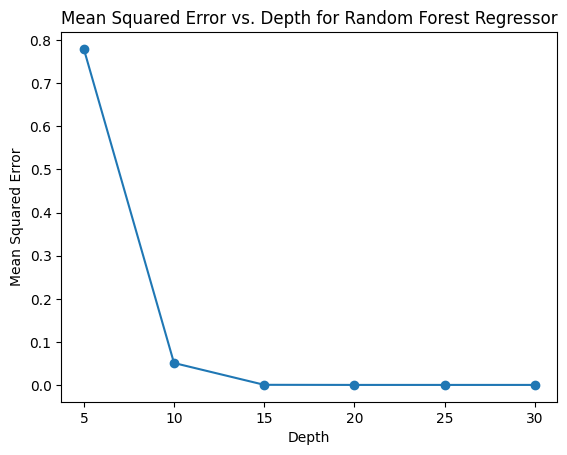

In [4]:
# Plotting the MSE scores
plt.plot(depths, mse_scores_depth_RF, marker='o')
plt.xlabel('Depth')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Depth for Random Forest Regressor')
plt.show()

### Finding Best N Estimator
Building multiple models with different number of decision trees "n_estimators" to find best "n_estimator". Best number of decision trees should be 200

In [5]:
# Define a list of n_estimators to test
n_estimators_values = [50, 100, 150, 200, 250, 300]
mse_score_nestimator_RF = []

# Iterate over different n_estimators and calculate MSE
for n_estimators in n_estimators_values:
    temp_model_RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=15, random_state=42)
    temp_model_RF.fit(X_train_Regression, Y_train_Regression)
    temp_y_pred_RF = temp_model_RF.predict(X_test_Regression)
    temp_mse_nestimator_RF = mean_squared_error(Y_test_Regression, temp_y_pred_RF)
    mse_score_nestimator_RF.append(temp_mse_nestimator_RF)
print(mse_score_nestimator_RF)

[0.0006483205093737645, 0.0006106396896884847, 0.0006013604516457175, 0.0005923306310046398, 0.0005910652022259504, 0.0005889156652692149]


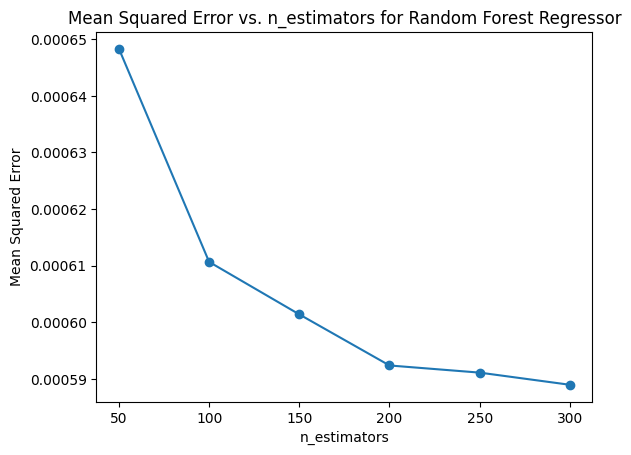

In [6]:
# Plotting the MSE scores
plt.plot(n_estimators_values, mse_score_nestimator_RF, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. n_estimators for Random Forest Regressor')
plt.show()

### Approaches to training Regression Models
For training and testing, there are two approaches. This is done by splitting by
1. Individual observations - better accuracy, messier model visualizations
2. Observation groups - lower accuracy, nicer model visualizations